# Restaurant Comment Analysis

<img src='https://assets.simpleviewcms.com/simpleview/image/fetch/c_pad,h_600,q_75,w_1122/https://lasvegas.simpleviewcrm.com/images/listings/original_Bacchanal-Buffet-at-Caesars-Palace.jpg'/>

### Importing Required Packages

In [84]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
warnings.filterwarnings("ignore")

## Load the data

In [85]:
df = pd.read_csv('restaurant.csv')

## Remember

## EDA - Exploratory Data Analysis

In [86]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [87]:
# Drop the columns that are not required
df = df.drop(['Unnamed: 0','business_id', 'review_id', 'user_id'], axis=1)

In [88]:
df.sample(5)

,stars,useful,funny,cool,text,date
9862,4,2,1,2,My new favorite buffet! Definitely better than...,2019-10-17 23:46:30
256,4,2,0,0,Very beautiful set-up and definitely better th...,2012-11-07 19:38:35
6916,5,0,0,0,Yum yum yum!! Love this buffet. I personally l...,2013-12-26 03:05:22
1594,5,0,0,0,"I do not like buffet, because usually the food...",2015-10-25 21:46:07
2611,4,0,0,0,We had about a 3 hr wait time once we checked ...,2017-09-03 05:13:21


In [89]:
df.isnull().sum()

stars     0
useful    0
funny     0
cool      0
text      0
date      0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   useful  10417 non-null  int64 
 2   funny   10417 non-null  int64 
 3   cool    10417 non-null  int64 
 4   text    10417 non-null  object
 5   date    10417 non-null  object
dtypes: int64(4), object(2)
memory usage: 488.4+ KB


In [91]:
df.describe()

,stars,useful,funny,cool
count,10417.000000,10417.000000,10417.000000,10417.000000
mean,3.777671,1.419603,0.640875,0.759720
std,1.331451,4.875888,3.347964,4.125847
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,176.000000,159.000000,172.000000


In [92]:
df['date'] = pd.to_datetime(df['date'])

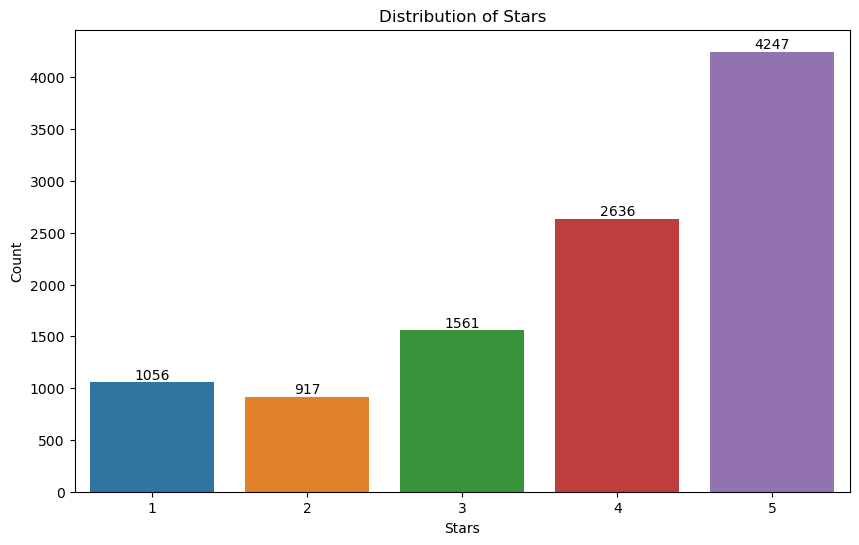

In [93]:
# Distribution of Stars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['stars'])
ax.bar_label(ax.containers[0])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


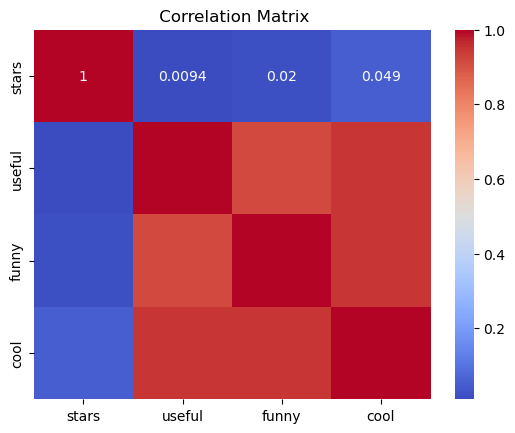

In [94]:
# Correlation Matrix
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title(' Correlation Matrix')
plt.show()

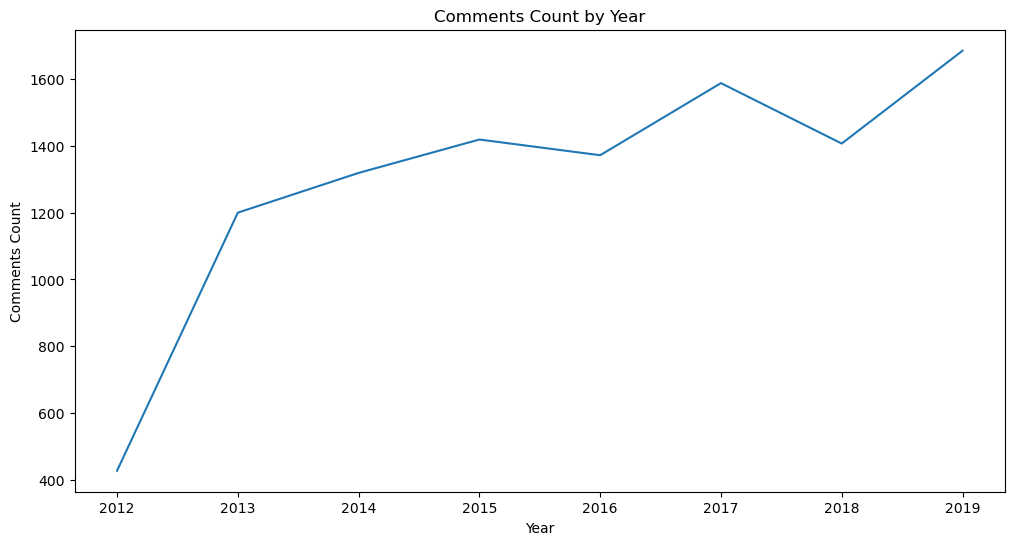

In [96]:
# Comments Count by Year

df['year'] = df['date'].dt.year
yearly_reviews = df.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', data=yearly_reviews)
plt.title('Comments Count by Year')
plt.xlabel('Year')
plt.ylabel('Comments Count')
plt.show()

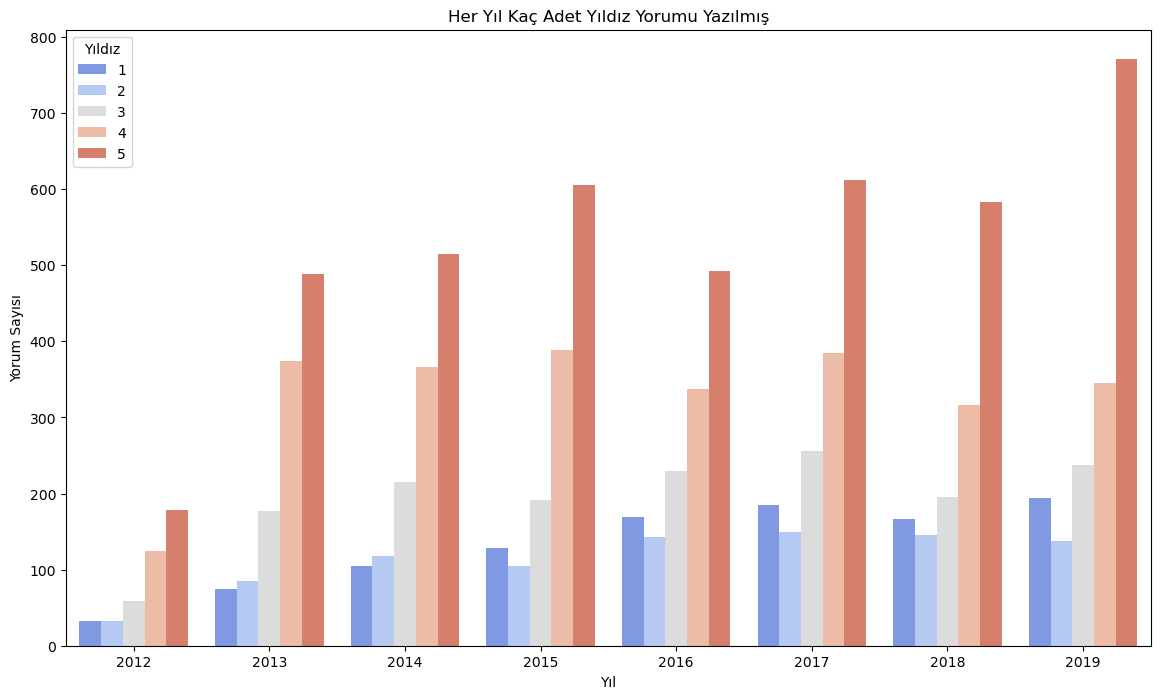

In [103]:
# Yıllara göre yıldızları gruplama
yearly_star_counts = df.groupby(['year', 'stars']).size().reset_index(name='count')
yearly_star_counts['year'] = yearly_star_counts['year'].astype(str)
yearly_star_counts['stars'] = yearly_star_counts['stars'].astype(str)

plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='count', hue='stars', data=yearly_star_counts, palette='coolwarm')
plt.title('Her Yıl Kaç Adet Yıldız Yorumu Yazılmış')
plt.xlabel('Yıl')
plt.ylabel('Yorum Sayısı')
plt.legend(title='Yıldız')
plt.show();

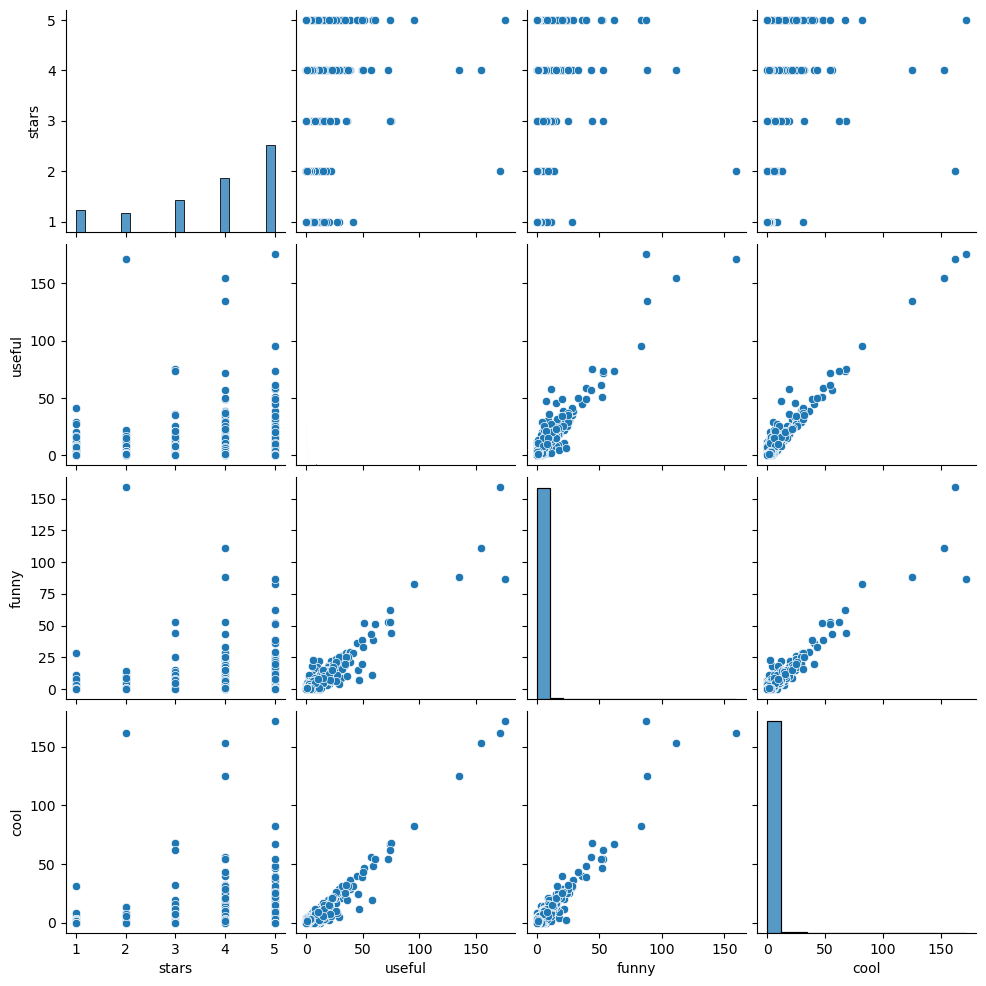

In [98]:
sns.pairplot(df[['stars', 'useful', 'funny', 'cool']])
plt.show()